# plots using python


minimum: 
4.4e-06
Improvement percentage(%): 
-89.52380952380953


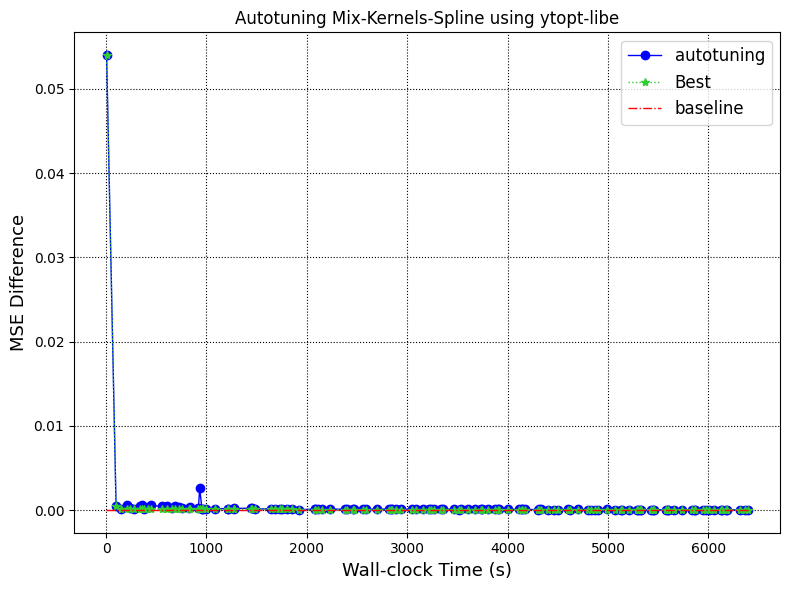

In [2]:
#!pip3 install numpy 
import numpy as np
#!pip3 install  pandas 
import pandas as pd
#!pip3 install matplotlib
import matplotlib.pyplot as plt

np.random.seed(12345)

# Read CSV
mdata = pd.read_csv("results.csv")

# Original value
t_orig = 4.2e-05

# Select columns 
col_index = mdata.iloc[:, 3:6]

# Length
ll = len(col_index.iloc[:, 0])

# Average 
avg = col_index.iloc[0, 0]

# Minimum
min_val = col_index.iloc[:, 0].min()

print("minimum: ")
print(min_val)

print("Improvement percentage(%): ")
print(100 * (min_val - t_orig) / t_orig)

# Baseline line
x = np.array([1, col_index.iloc[:, 1].max()])
y = t_orig * x / x   # keeps constant at t_orig

# Plot
plt.figure(figsize=(8, 6))

plt.plot(
    col_index.iloc[:, 1],
    col_index.iloc[:, 0],
    color="blue",
    marker="o",
    ls="-",
    lw=1,
    label="autotuning"
)

plt.plot(
    col_index.iloc[:, 1],
    col_index.iloc[:, 2],
    color="limegreen",
    marker="*",
    ls=":",
    lw=1,
    label="Best"
)

plt.plot(
    x,
    y,
    color="red",
    ls="-.",
    lw=1,
    label="baseline"
)

#plot area
#plt.axis((0, col_index.iloc[:, 1].max(), 0, col_index.iloc[:, 0].max()))

# Labels and title
plt.xlabel("Wall-clock Time (s)", fontsize=13)
plt.ylabel("MSE Difference", fontsize=13)
plt.title("Autotuning Mix-Kernels-Spline using ytopt-libe")

# Grid (dotted like R)
plt.grid(True, linestyle="dotted", color="black")

# Legend (position approximated from R)
plt.legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()